# **05 - Football Dataset**
___

#### **Autor/es:**
- Peitsch, Pablo [[1]](#1)

**Fecha:** 2022-09-06

## **DATASETS**
___

### **1. Data exploration**

Luego de importar los paquetes necesarios, se exploran los datasets para su posterior análisis.

In [1]:
# Library imports
library(tidyverse)
# Datasets folder
data_folder <- "datasets"
# Files list of datasets folder
list_files <- list.files(data_folder)
# Number of datasets
n <- length(list_files)
# Se cambia tamaño del plot
options(repr.plot.width=25, repr.plot.height=12)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.8     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.1
v readr   2.1.2     v forcats 0.5.2
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
# Name list of datasets
d_names <- list()
f_names <- list()
for (i in 1:n){
    f_names[i] <- list_files[i]
    temp_name <- list_files[i]
    temp_name <- tools::file_path_sans_ext(temp_name)
    d_names[i] <- temp_name
    temp_df <- read.csv(file.path(data_folder, f_names[i]), dec=",")
    assign(d_names[[i]], temp_df)
}

In [3]:
# Structure of datasets, data variables and typesa cell in jupyter notebook, we get a nice table with the dataa cell in jupyter notebook, we get a nice table with the data
for (i in 1:n){
    print(d_names[[i]])
    str(get(d_names[[i]]))
    print(colnames(get(d_names[[i]])))
    print("----------")
}

[1] "appearances"
'data.frame':	356513 obs. of  19 variables:
 $ gameID       : int  81 81 81 81 81 81 81 81 81 81 ...
 $ playerID     : int  560 557 548 628 1006 551 654 554 555 631 ...
 $ goals        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ownGoals     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ shots        : int  0 0 0 0 0 0 0 3 3 1 ...
 $ xGoals       : chr  "0" "0" "0" "0" ...
 $ xGoalsChain  : chr  "0" "0.106513060629368" "0.127737730741501" "0.106513060629368" ...
 $ xGoalsBuildup: chr  "0" "0.106513060629368" "0.127737730741501" "0.106513060629368" ...
 $ assists      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ keyPasses    : int  0 1 0 0 0 0 1 0 0 1 ...
 $ xAssists     : chr  "0" "0.106513060629368" "0" "0" ...
 $ position     : chr  "GK" "DR" "DC" "DC" ...
 $ positionOrder: int  1 2 3 3 4 7 7 11 12 13 ...
 $ yellowCard   : int  0 0 0 0 0 0 0 1 0 0 ...
 $ redCard      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ time         : int  90 82 90 90 90 90 61 90 69 90 ...
 $ substituteIn : int  0 222605 0 0 0 0 222606

### **2. Foreign and principal keys**

Se evalúan las claves principales y foráneas en cada dataset; luego, se muestran las imágenes generadas.

In [4]:
# Datasets folder
keys_folder <- "keys"
# Files list of datasets folder
list_pdf <- list.files(keys_folder)
list_pdf

[1] "appearances.jpg" "appearances.pdf" "Keys.xlsx"       "players.jpg"    
[5] "players.pdf"     "teams.jpg"       "teams.pdf"

<img src="keys/appearances.jpg" alt="appearances"  width="900" height="600">
<img src="keys/players.jpg" alt="players"  width="900" height="600">
<img src="keys/teams.jpg" alt="teams"  width="900" height="600">

## **RELATIONAL DATA**
___

### **1. Los 10 equipos más goleadores**

In [5]:
df_team <- inner_join(teams, teamstats, by="teamID")

In [6]:
str(df_team)

'data.frame':	25360 obs. of  17 variables:
 $ teamID       : int  71 71 71 71 71 71 71 71 71 71 ...
 $ name         : chr  "Aston Villa" "Aston Villa" "Aston Villa" "Aston Villa" ...
 $ gameID       : int  82 91 104 113 129 133 145 152 164 171 ...
 $ season       : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ date         : chr  "2015-08-08 18:00:00" "2015-08-14 22:45:00" "2015-08-22 18:00:00" "2015-08-29 18:00:00" ...
 $ location     : chr  "a" "h" "a" "h" ...
 $ goals        : int  1 0 1 2 2 0 2 0 0 1 ...
 $ xGoals       : chr  "0.782253" "0.219118" "0.765278" "2.27406" ...
 $ shots        : int  7 5 11 21 11 13 10 13 10 9 ...
 $ shotsOnTarget: int  3 1 2 6 4 3 4 2 1 3 ...
 $ deep         : int  2 3 6 12 5 5 2 7 2 4 ...
 $ ppda         : chr  "11.8462" "10.0333" "8.4762" "8.6364" ...
 $ fouls        : int  13 14 15 10 13 10 13 12 17 10 ...
 $ corners      : int  3 3 4 5 5 2 1 9 4 4 ...
 $ yellowCards  : int  4 2 3 2 1 2 0 1 3 2 ...
 $ redCards     : int  0 0 0 0 0 0 

In [7]:
team_goals <- group_by(df_team, teamID) %>% mutate(total_goals=sum(goals)) %>%
    subset(select=-c(yellowCards, redCards, result, season, gameID, date, location, goals, fouls, corners, ppda)) %>% arrange(desc(total_goals))

In [8]:
best_10_goals <- distinct(team_goals, teamID, .keep_all=TRUE)
best_10_goals <- head(best_10_goals, 10)
best_10_goals

teamID,name,xGoals,shots,shotsOnTarget,deep,total_goals
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
148,Barcelona,1.76141,10,4,5,698
161,Paris Saint Germain,1.33457,7,3,3,642
150,Real Madrid,1.54271,27,8,11,628
117,Bayern Munich,3.22904,23,9,6,628
88,Manchester City,1.9242,20,7,8,620
105,Napoli,1.15002,14,3,3,542
98,Juventus,1.82451,21,5,13,533
87,Liverpool,0.329873,8,3,5,519
129,Borussia Dortmund,2.42013,18,7,7,505


### **2. Gráfica de los 10 equipos más goleadores**

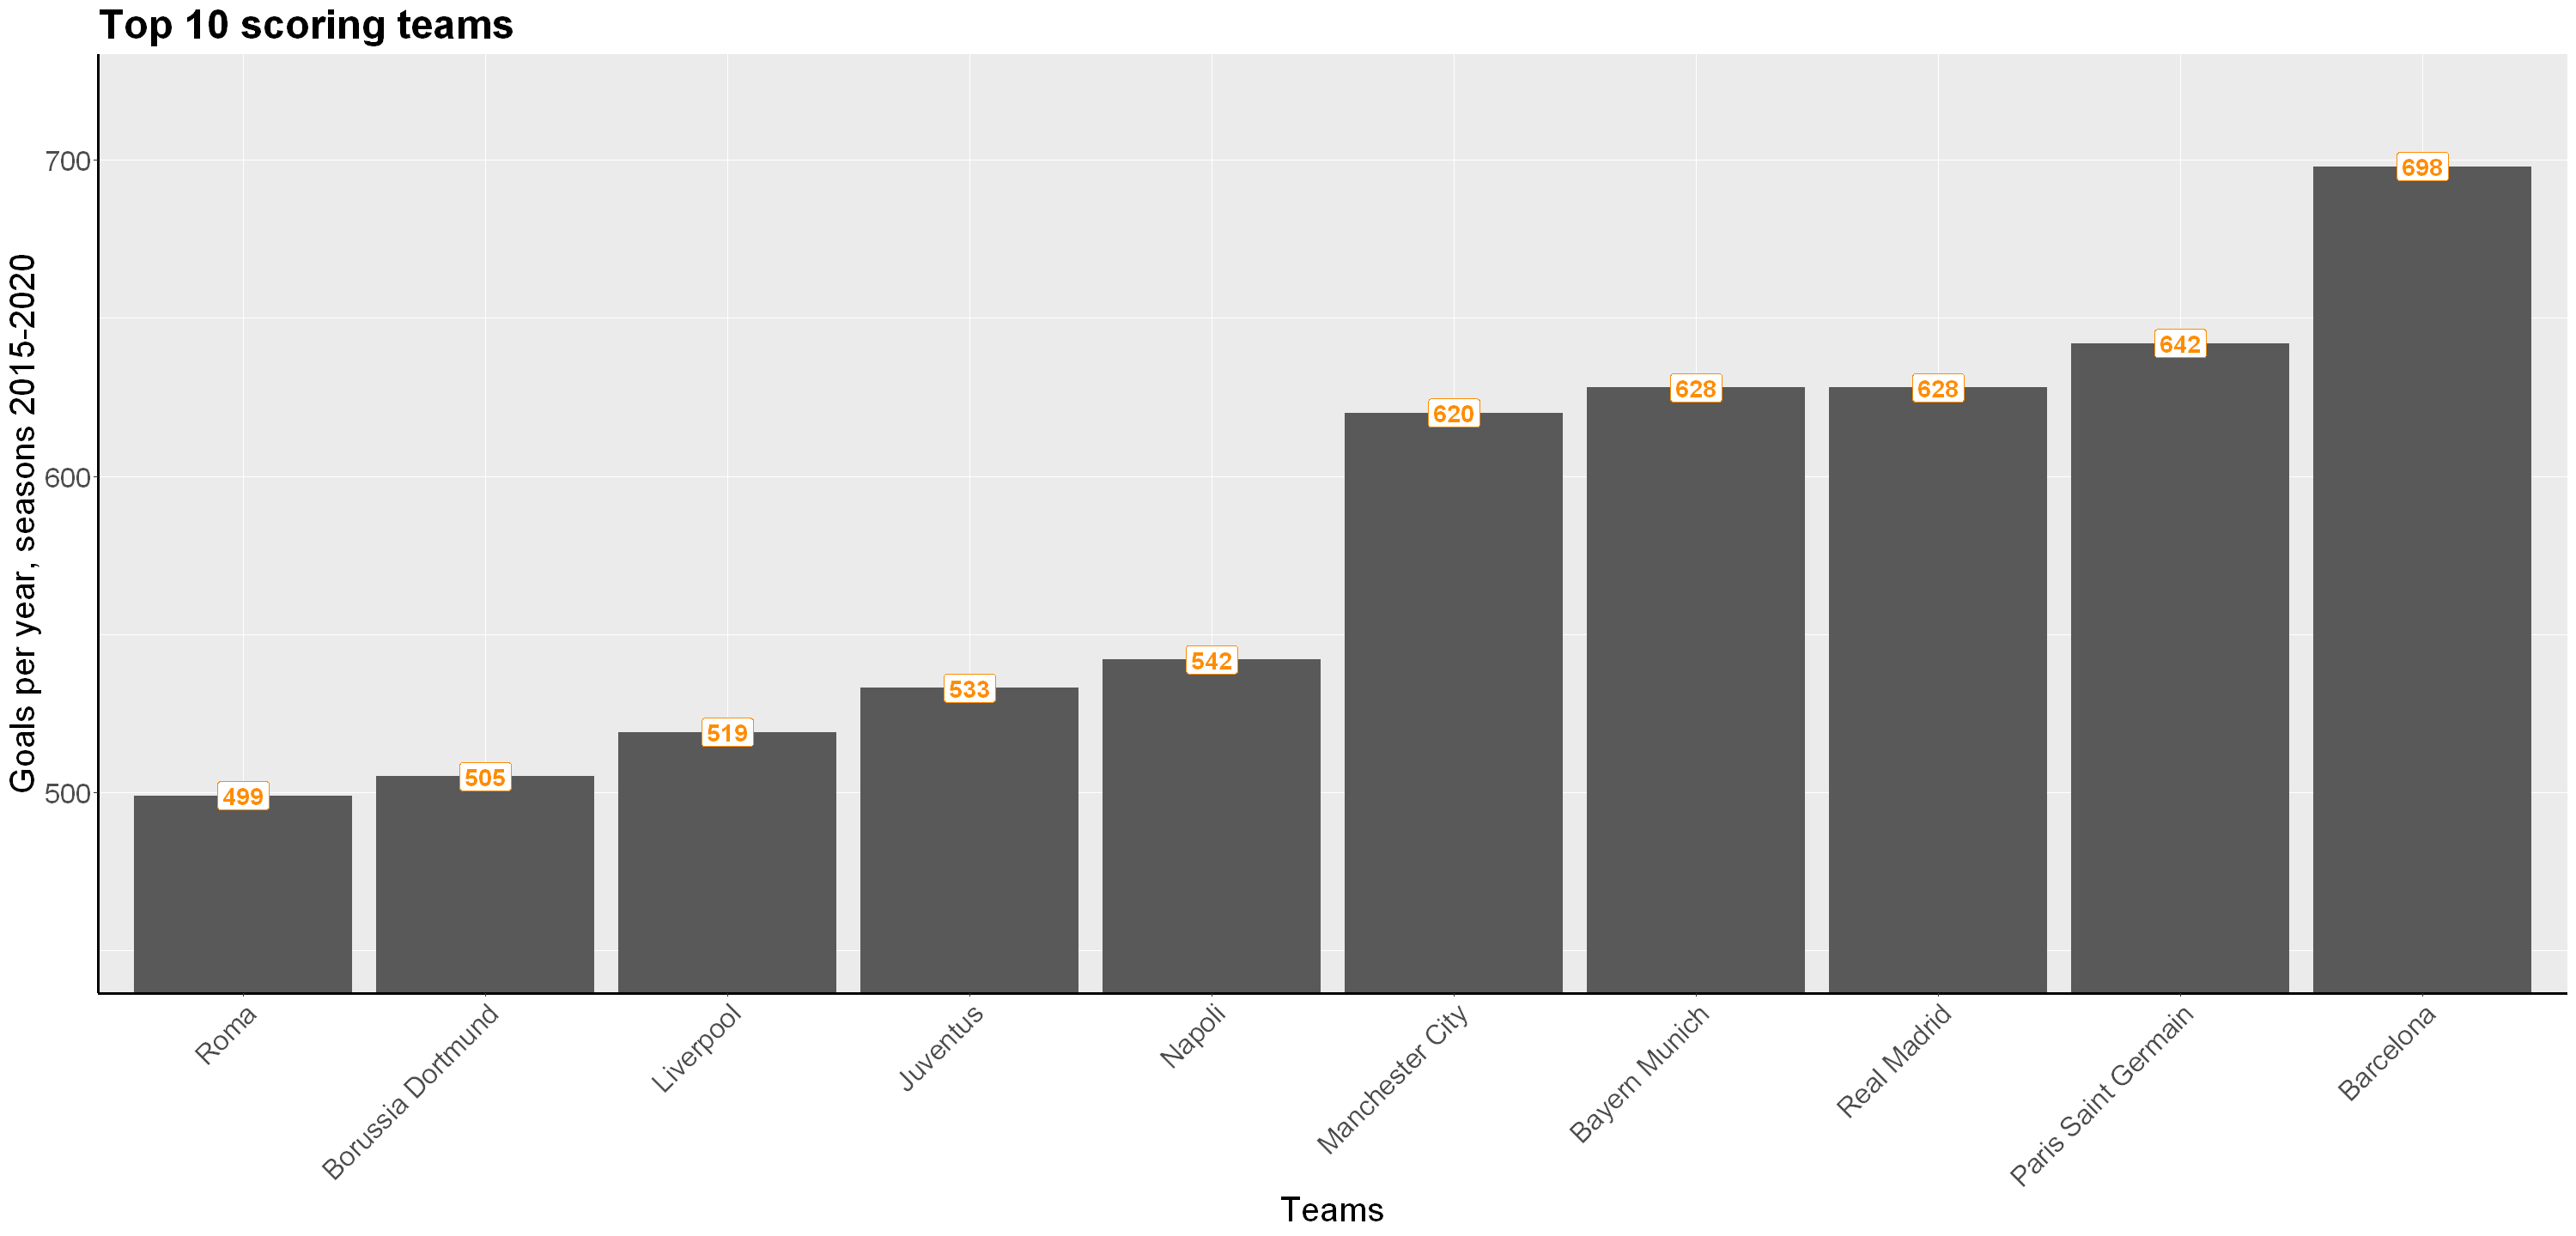

In [9]:
ggplot(best_10_goals, aes(x=reorder(name, total_goals), y=total_goals)) + 
    geom_bar(stat = "identity") +
    geom_label(aes(label=total_goals),
                #vjust=-0.9, 
                color="dark orange", 
                hjust="center", 
                angle=0, 
                size=6.0,
                fontface="bold"
            ) +
    coord_cartesian(ylim=c(450, 720)) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 24)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), plot.title = element_text(color="Black", size=28, face="bold")) +
    labs(x="Teams", y="Goals per year, seasons 2015-2020", title="Top 10 scoring teams")

### **3. Gráfica de los 10 equipos con mayor número de tiros al arco**

In [10]:
best_10_shots <- group_by(team_goals, teamID) %>% mutate(total_shots=sum(shots)) %>%
    summarise(name, total_goals, total_shots, total_deep=sum(deep), total_OnTarget=sum(shotsOnTarget)) %>%
    arrange(desc(total_shots)) %>% distinct(teamID, .keep_all=TRUE)

`summarise()` has grouped output by 'teamID'. You can override using the
`.groups` argument.


In [11]:
best_10_shots <- head(best_10_shots, 10)
best_10_shots

teamID,name,total_goals,total_shots,total_deep,total_OnTarget
<int>,<chr>,<int>,<int>,<int>,<int>
105,Napoli,542,4645,2216,1692
88,Manchester City,620,4609,3470,1664
150,Real Madrid,628,4463,2542,1746
87,Liverpool,519,4267,2879,1534
117,Bayern Munich,628,4261,2815,1708
95,Roma,499,4239,2195,1469
98,Juventus,533,4220,2029,1502
106,Inter,474,4144,2124,1400
148,Barcelona,698,4097,3495,1800


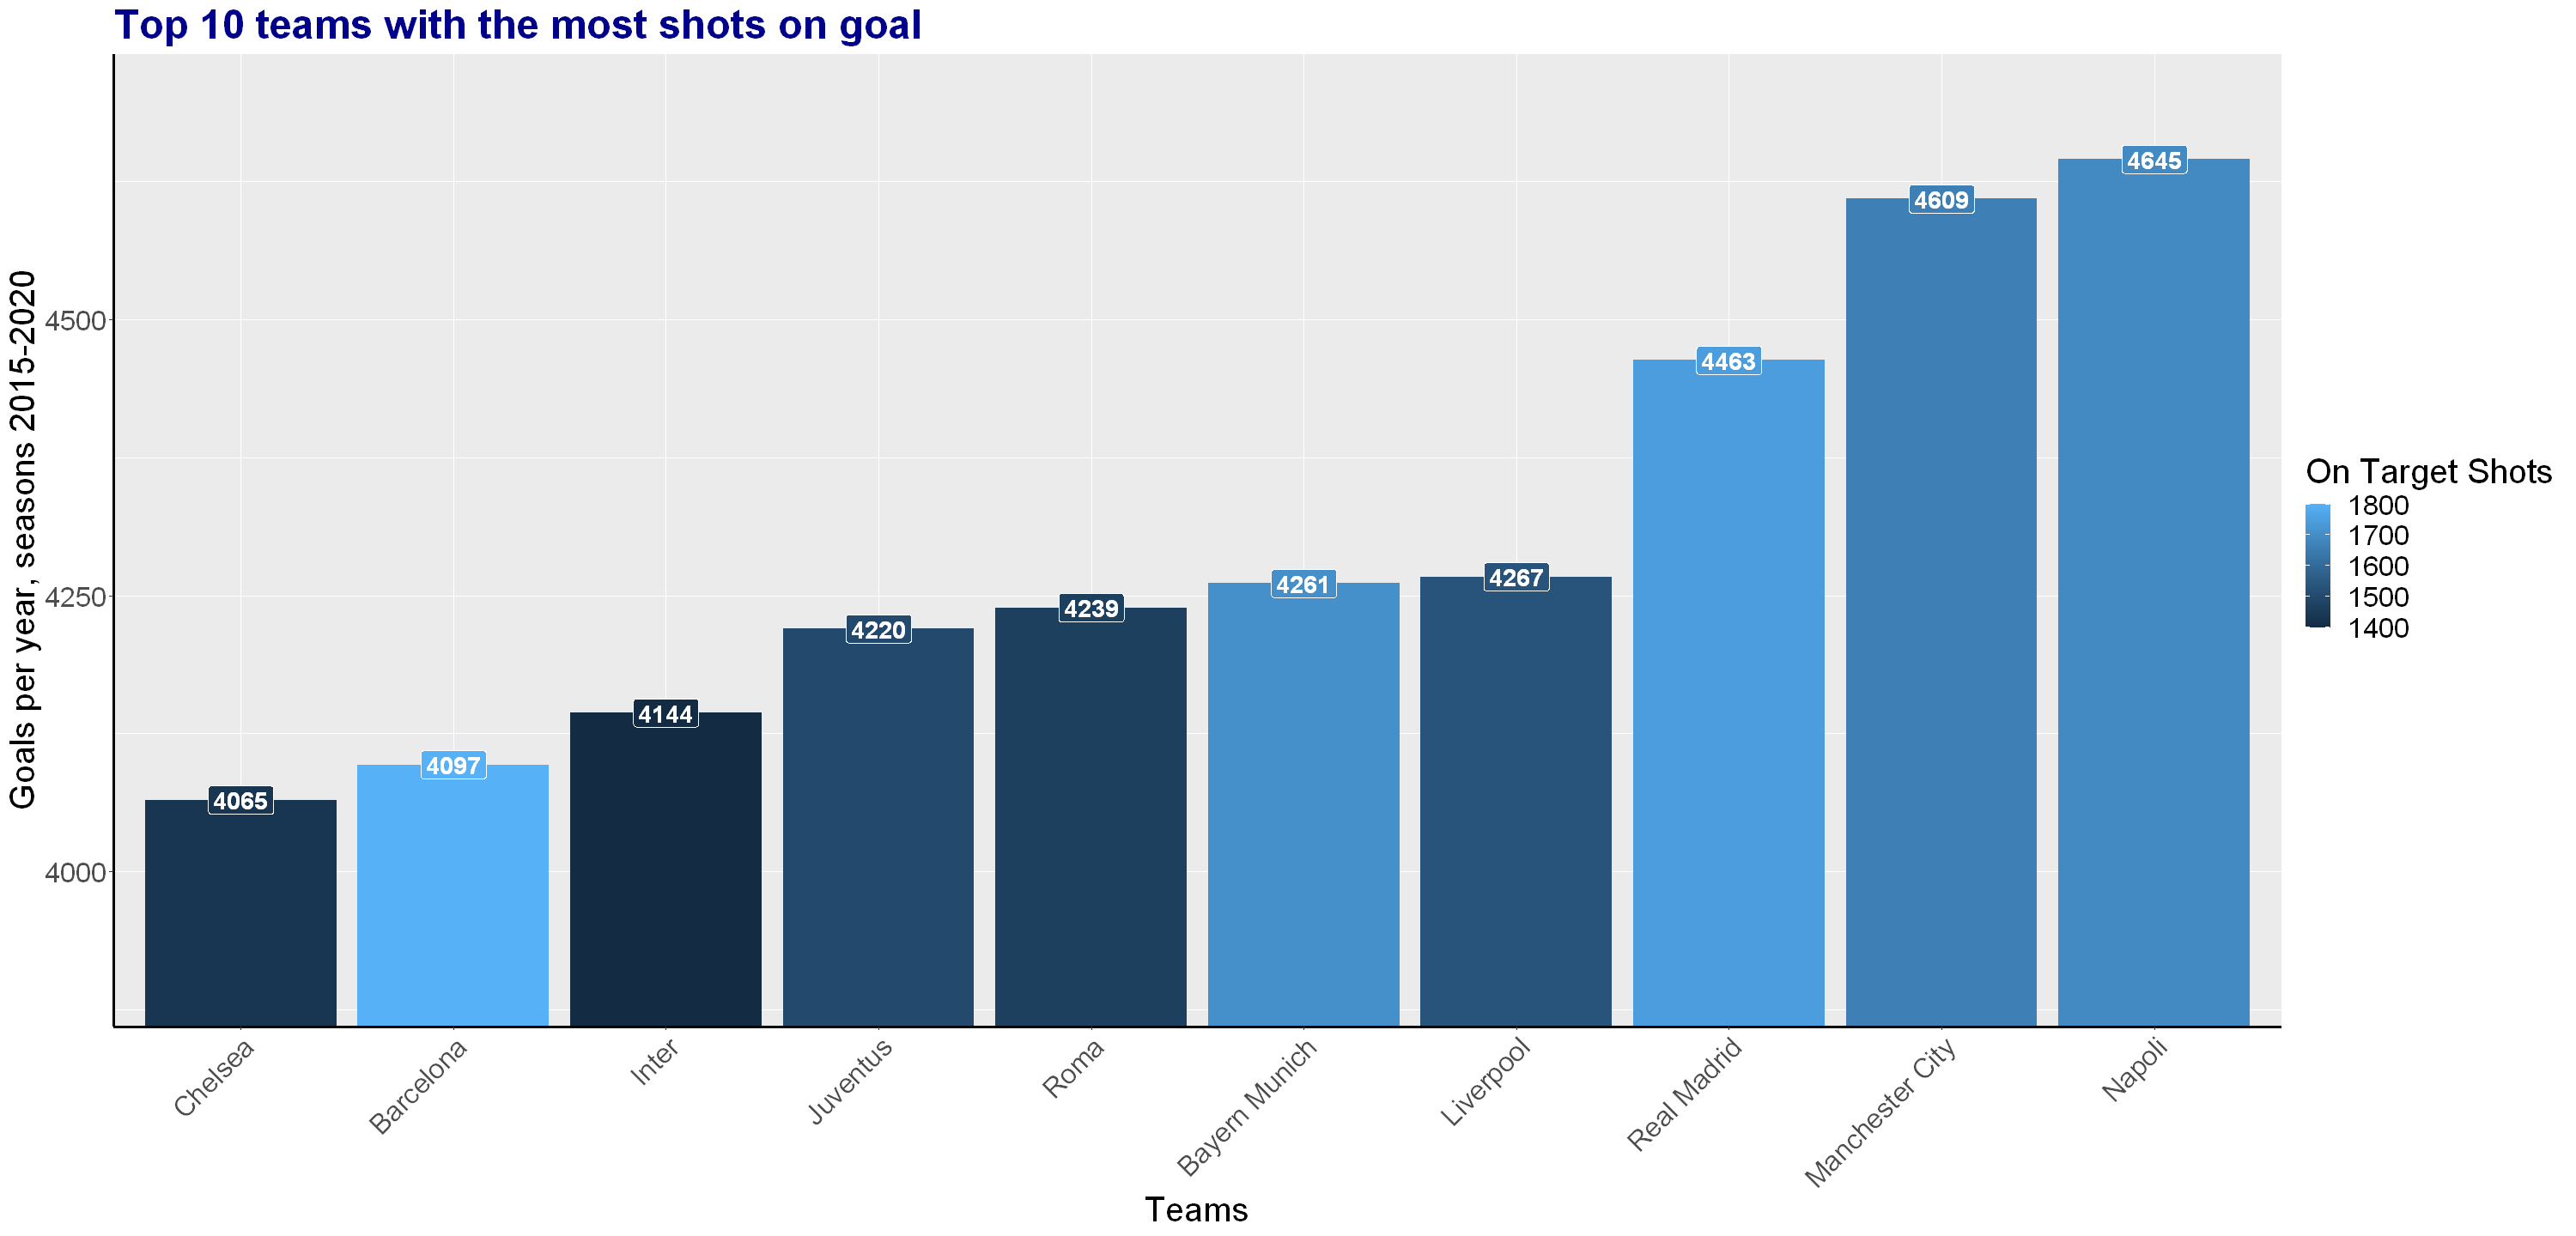

In [12]:
ggplot(best_10_shots, aes(x=reorder(name, total_shots), y=total_shots, fill=total_OnTarget)) + 
    geom_bar(stat = "identity") +
    geom_label(aes(label=total_shots),
                color="white", 
                hjust="center", 
                angle=0, 
                size=6.0,
                fontface="bold"
            ) +
    coord_cartesian(ylim=c(3900, 4700)) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 24)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), plot.title = element_text(color="Dark Blue", size=28, face="bold")) +
    labs(x="Teams", y="Goals per year, seasons 2015-2020", fill="On Target Shots", title="Top 10 teams with the most shots on goal")

### **4. Gráfica de los 10 equipos más goleadores y con mayor número de tiros al arco**

In [13]:
teams_stats <- group_by(df_team, teamID) %>% mutate(total_shots=sum(shots), total_goals=sum(goals), total_deep=sum(deep), total_OnTarget=sum(shotsOnTarget)) %>%
    arrange(desc(total_goals)) %>% subset(select=-c(yellowCards, redCards, result, season, gameID, date, location, goals, fouls, corners, ppda))

In [14]:
teams_stats <- distinct(teams_stats, teamID, .keep_all=TRUE) %>%
    summarise(name, total_goals, total_shots, total_deep, total_OnTarget) %>% arrange(desc(total_goals))

In [15]:
best_10 <- head(teams_stats, 10)
best_10

teamID,name,total_goals,total_shots,total_deep,total_OnTarget
<int>,<chr>,<int>,<int>,<int>,<int>
148,Barcelona,698,4097,3495,1800
161,Paris Saint Germain,642,3836,2607,1588
117,Bayern Munich,628,4261,2815,1708
150,Real Madrid,628,4463,2542,1746
88,Manchester City,620,4609,3470,1664
105,Napoli,542,4645,2216,1692
98,Juventus,533,4220,2029,1502
87,Liverpool,519,4267,2879,1534
129,Borussia Dortmund,505,3503,2247,1355


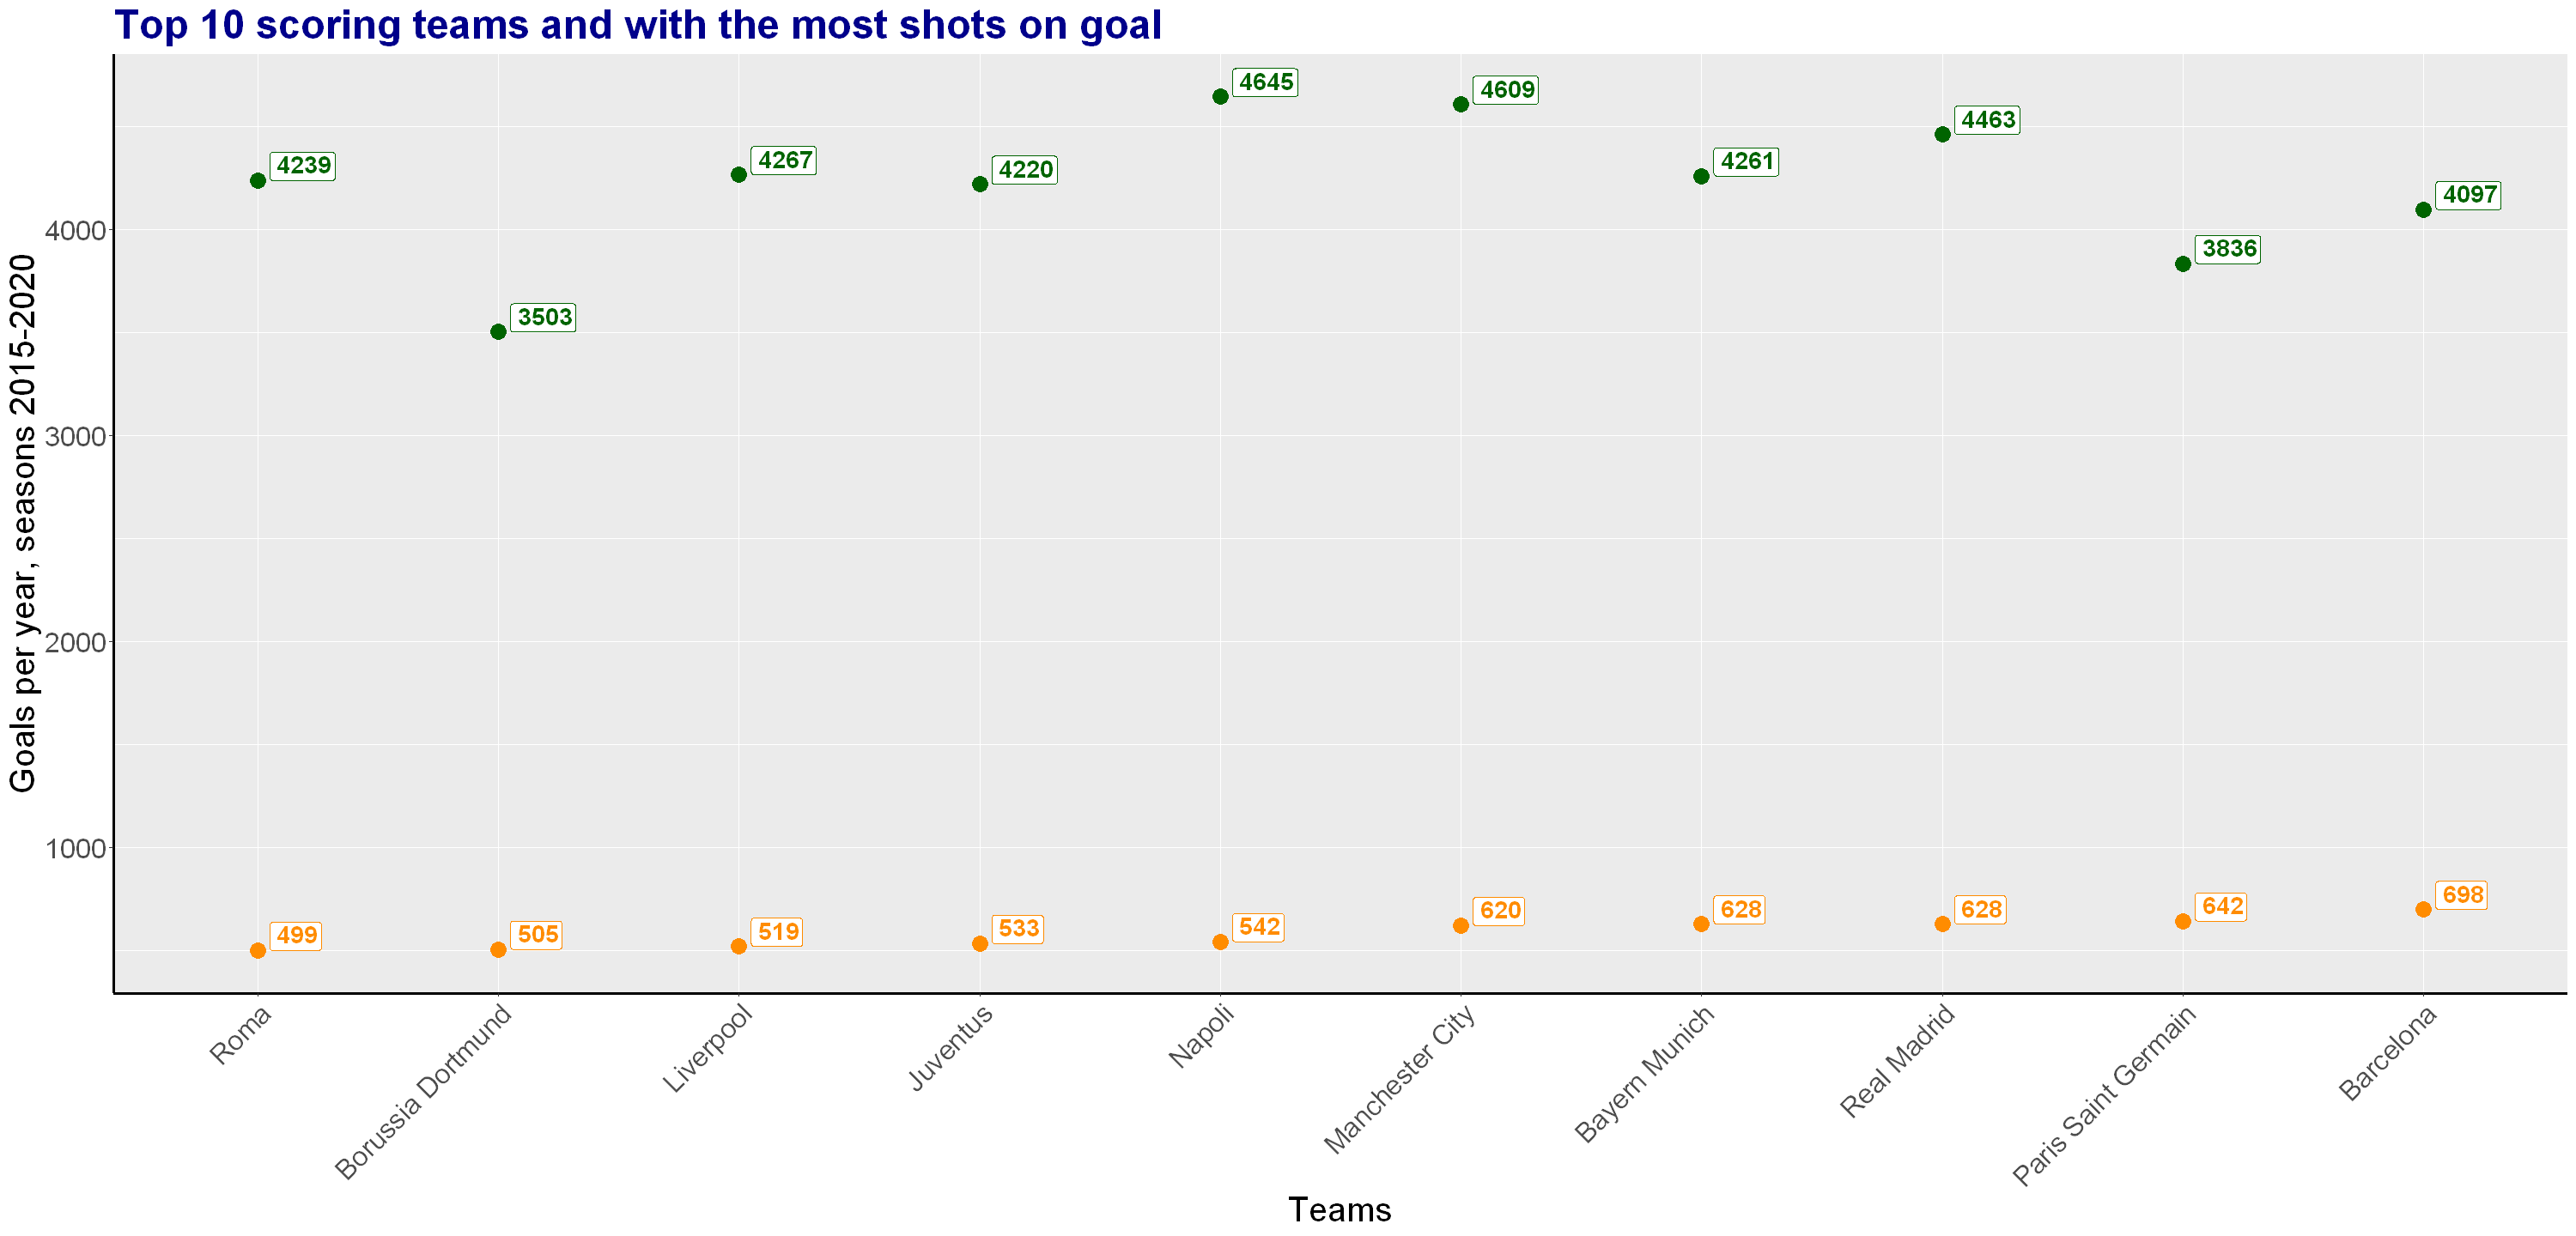

In [16]:
ggplot(best_10, aes(x=reorder(name, total_goals))) + 
    geom_point(aes(y=total_shots), size=5, color="dark green") +
    geom_label(aes(label=total_shots, y=total_shots),
                vjust="bottom",
                color="dark green", 
                hjust="left", 
                angle=0, 
                size=6.0,
                fontface="bold",
                nudge_x=0.05,
            ) +
    geom_point(aes(y=total_goals), size=5, color="dark orange") +
    geom_label(aes(label=total_goals, y=total_goals),
                vjust="bottom",
                color="dark orange", 
                hjust="left", 
                angle=0, 
                size=6.0,
                fontface="bold",
                nudge_x=0.05,
            ) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 24)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), plot.title = element_text(color="Dark Blue", size=28, face="bold")) +
    labs(x="Teams", y="Goals per year, seasons 2015-2020", title="Top 10 scoring teams and with the most shots on goal", color="Tendencies")

Si realizamos una estimación lineal por ambos grupos de datos se podría establecer una relación lineal entre ambos. Esto podría indicar que a mayor número de tiros al arco, mayor probabilidad de gol.

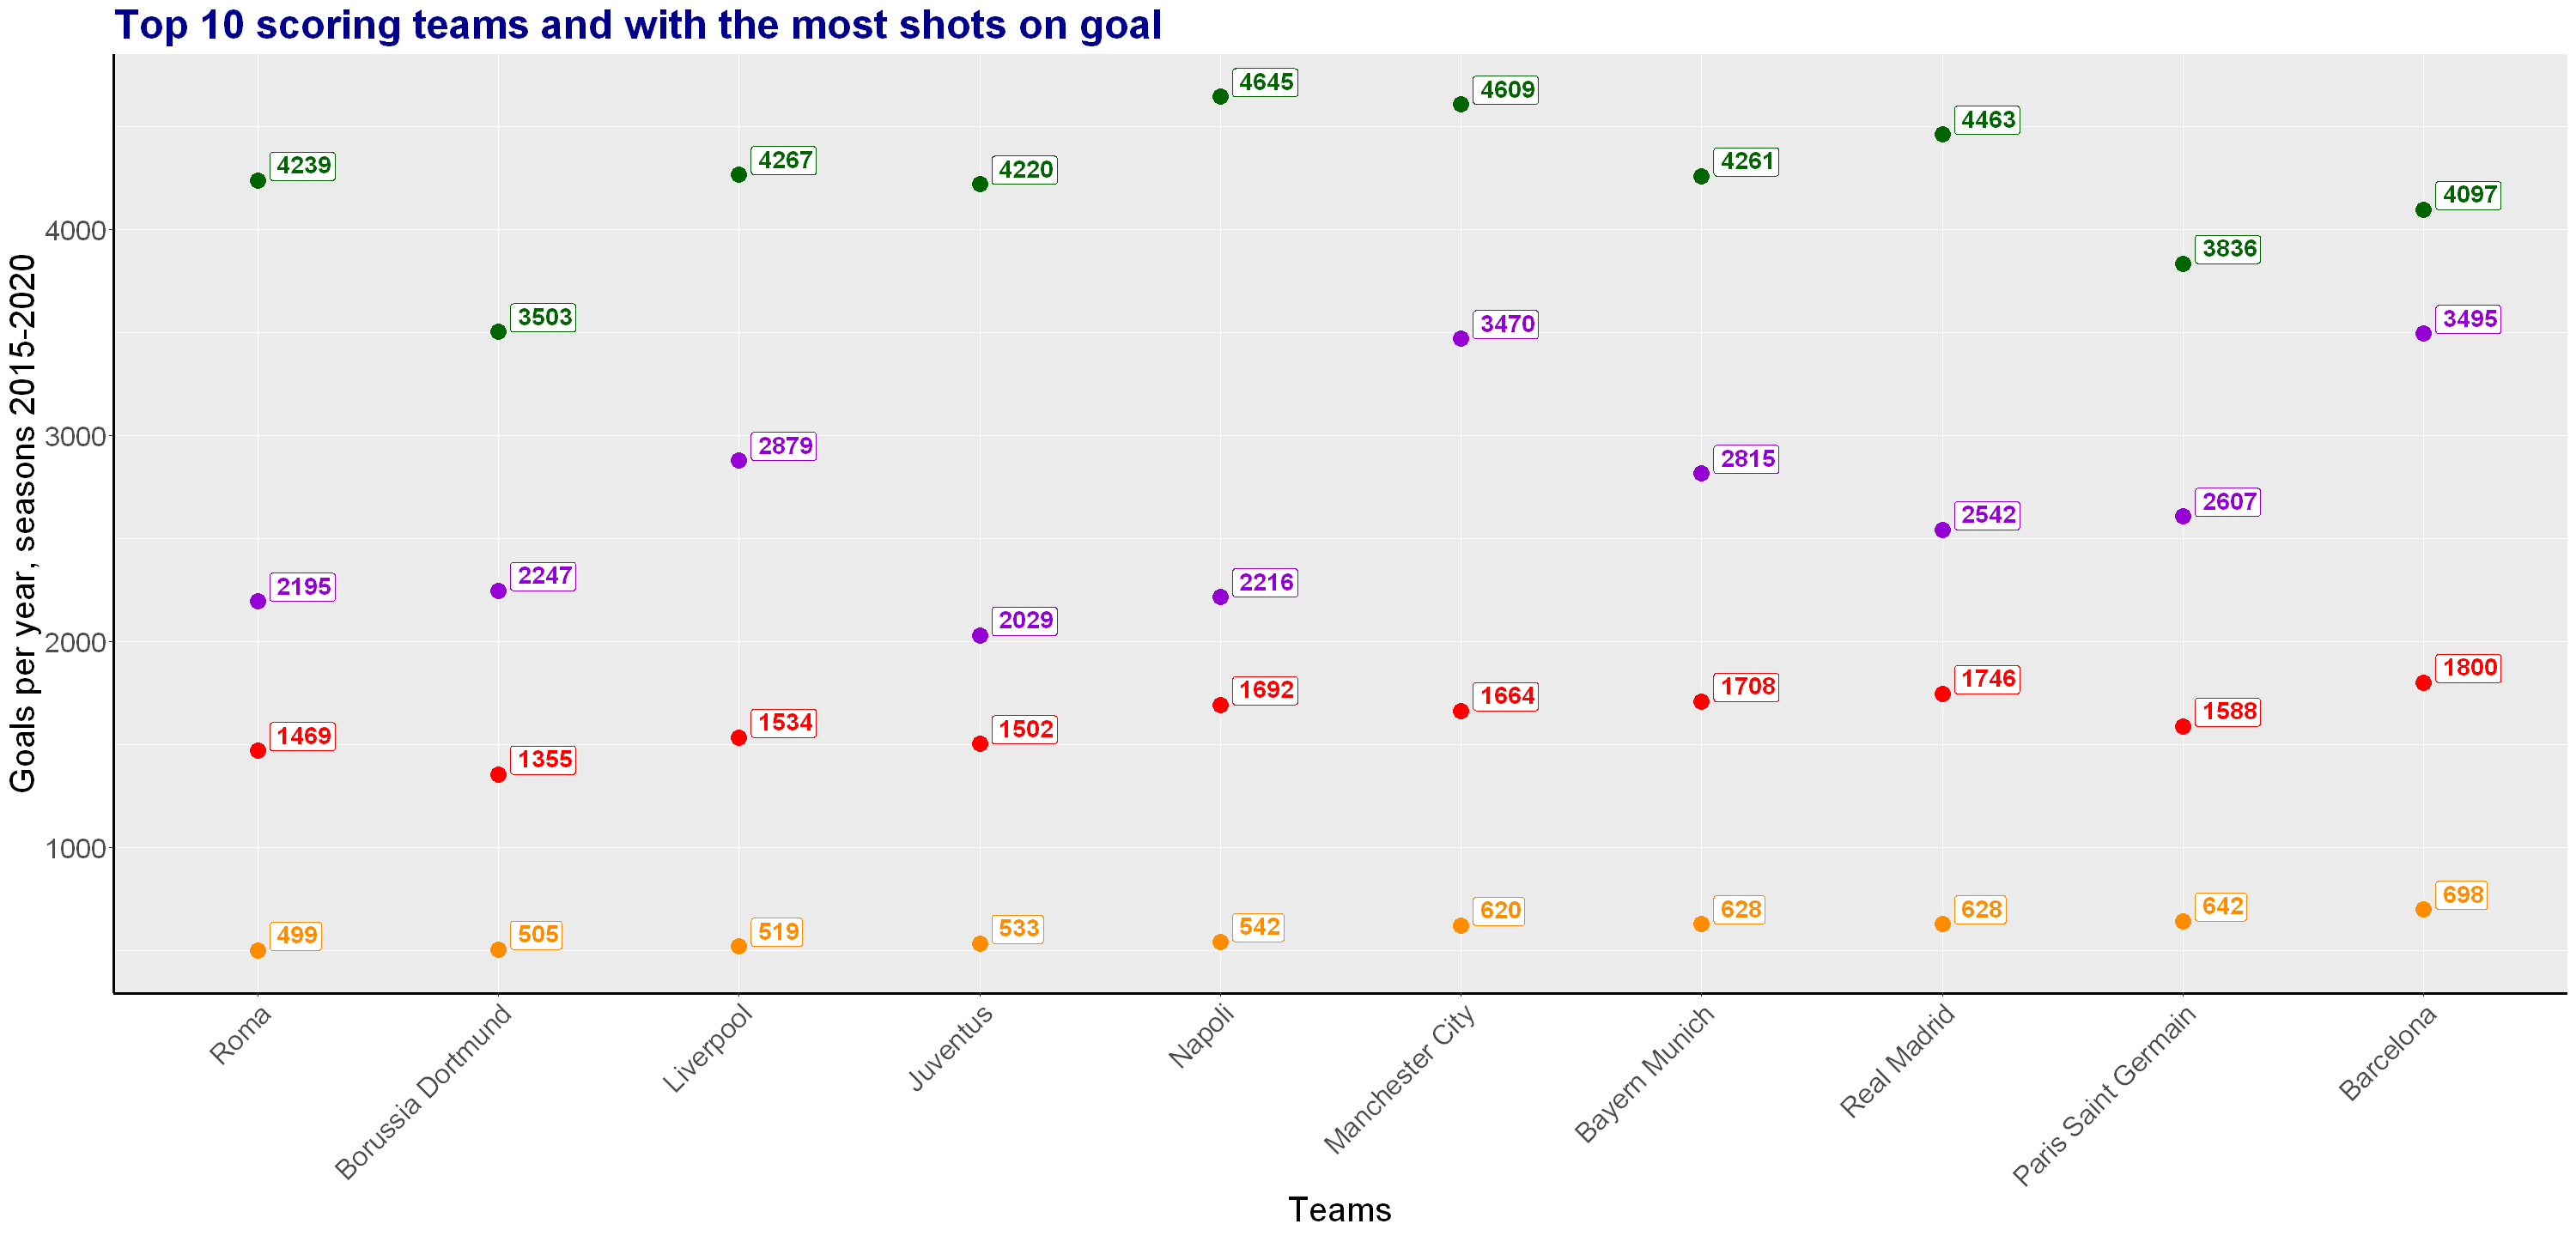

In [17]:
ggplot(best_10, aes(x=reorder(name, total_goals))) + 
    geom_point(aes(y=total_shots), size=5, color="dark green") +
    geom_label(aes(label=total_shots, y=total_shots),
                vjust="bottom",
                color="dark green", 
                hjust="left", 
                angle=0, 
                size=6.0,
                fontface="bold",
                nudge_x=0.05,
            ) +
    geom_point(aes(y=total_goals), size=5, color="dark orange") +
    geom_label(aes(label=total_goals, y=total_goals),
                vjust="bottom",
                color="dark orange", 
                hjust="left", 
                angle=0, 
                size=6.0,
                fontface="bold",
                nudge_x=0.05,
            ) +
    geom_point(aes(y=total_OnTarget), size=5, color="red") +
    geom_label(aes(label=total_OnTarget, y=total_OnTarget),
                vjust="bottom",
                color="red", 
                hjust="left", 
                angle=0, 
                size=6.0,
                fontface="bold",
                nudge_x=0.05,
            ) +
    geom_point(aes(y=total_deep), size=5, color="dark violet") +
    geom_label(aes(label=total_deep, y=total_deep),
                vjust="bottom",
                color="dark violet", 
                hjust="left", 
                angle=0, 
                size=6.0,
                fontface="bold",
                nudge_x=0.05,
            ) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 24)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), plot.title = element_text(color="Dark Blue", size=28, face="bold")) +
    labs(x="Teams", y="Goals per year, seasons 2015-2020", title="Top 10 scoring teams and with the most shots on goal", color="Tendencies")

Algo similar a lo anterior se podría establecer con este gráfico. Mayor probabilidad de gol a medida que hay mayor tiros al arco y cuando estos tiros son directos y con profundidad.

### **5. Gráfica de los equipos más goleadores y con mayor número de tiros al arco**

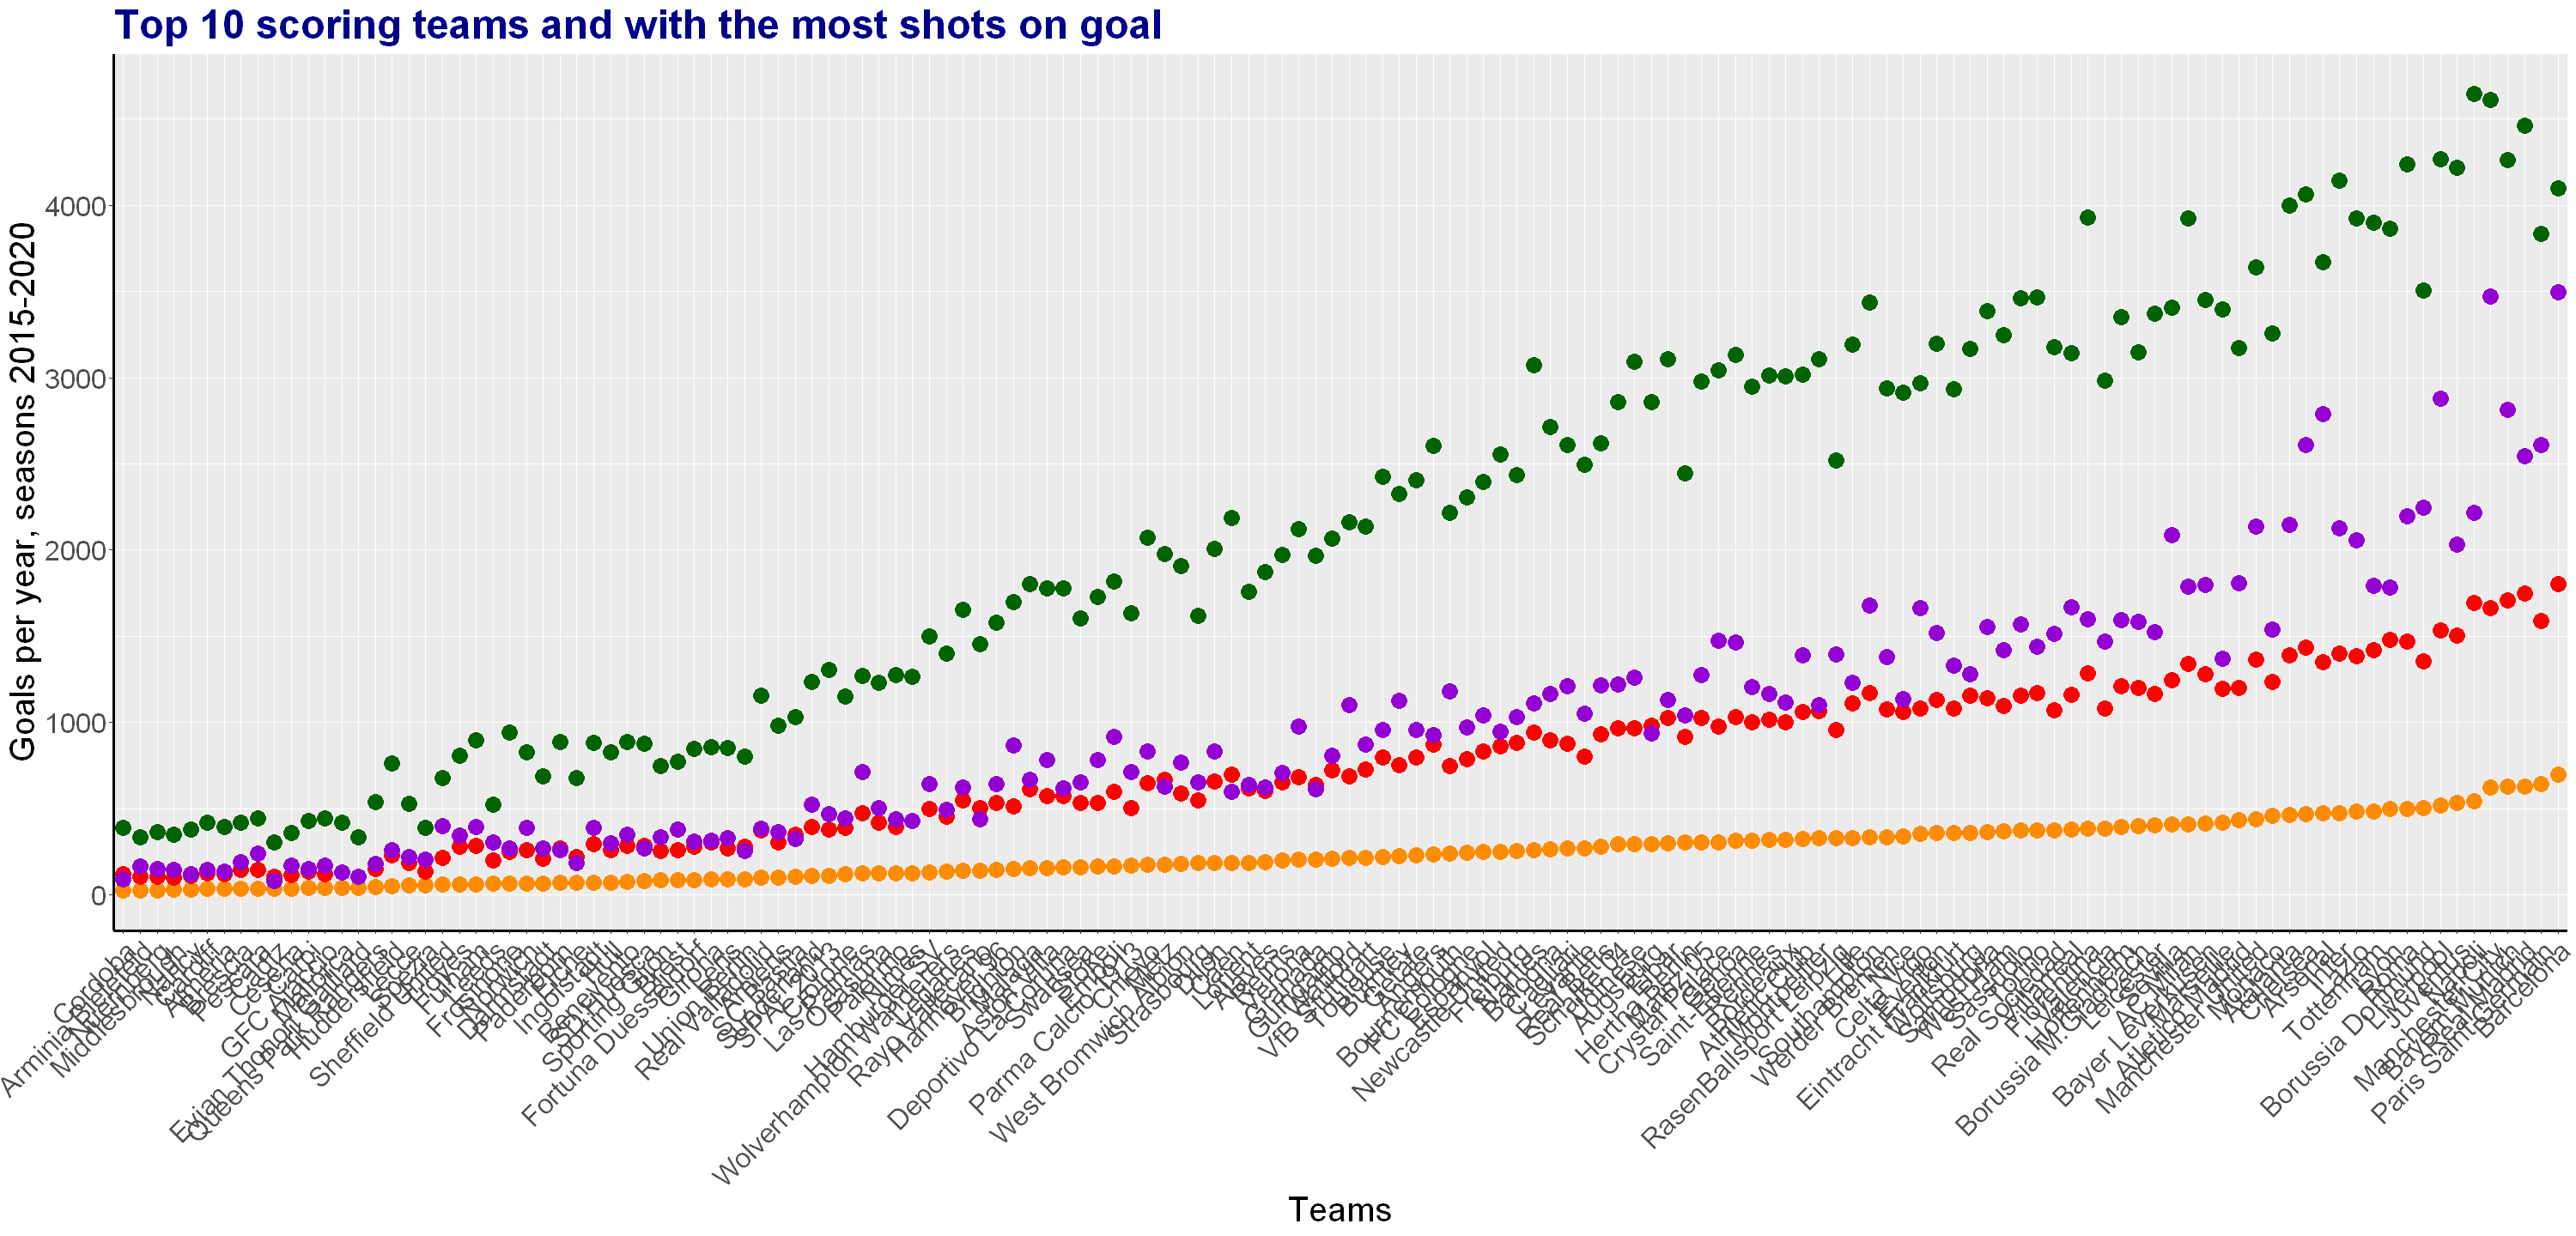

In [18]:
ggplot(teams_stats, aes(x=reorder(name, total_goals))) + 
    geom_point(aes(y=total_shots), size=5, color="dark green") +
    geom_point(aes(y=total_goals), size=5, color="dark orange") +
    geom_point(aes(y=total_OnTarget), size=5, color="red") +
    geom_point(aes(y=total_deep), size=5, color="dark violet") +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 24)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), plot.title = element_text(color="Dark Blue", size=28, face="bold")) +
    labs(x="Teams", y="Goals per year, seasons 2015-2020", title="Top 10 scoring teams and with the most shots on goal", color="Tendencies")

En el gráfico anterior, se puede observar mejor la relación lineal que se mencionaba anteriormente.

### **6. Selección de liga**

A continuación, se previsualizan los datos sobre las ligas para establecer algún criterio de selección.

In [19]:
d_names

[[1]]
[1] "appearances"

[[2]]
[1] "games"

[[3]]
[1] "leagues"

[[4]]
[1] "players"

[[5]]
[1] "shots"

[[6]]
[1] "teams"

[[7]]
[1] "teamstats"

In [20]:
leagues

leagueID,name,understatNotation
<int>,<chr>,<chr>
1,Premier League,EPL
2,Serie A,Serie_A
3,Bundesliga,Bundesliga
4,La Liga,La_liga
5,Ligue 1,Ligue_1


In [21]:
df_leagues <- inner_join(leagues, games, by="leagueID") %>% group_by(leagueID)

In [22]:
str(df_leagues)

grouped_df [12,680 x 13] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ leagueID         : int [1:12680] 1 1 1 1 1 1 1 1 1 1 ...
 $ name             : chr [1:12680] "Premier League" "Premier League" "Premier League" "Premier League" ...
 $ understatNotation: chr [1:12680] "EPL" "EPL" "EPL" "EPL" ...
 $ gameID           : int [1:12680] 81 82 83 84 85 86 87 88 89 90 ...
 $ season           : int [1:12680] 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ date             : chr [1:12680] "2015-08-08 15:45:00" "2015-08-08 18:00:00" "2015-08-08 18:00:00" "2015-08-08 18:00:00" ...
 $ homeTeamID       : int [1:12680] 89 73 72 75 79 80 86 83 85 76 ...
 $ awayTeamID       : int [1:12680] 82 71 90 77 78 84 74 81 87 88 ...
 $ homeGoals        : int [1:12680] 1 0 2 4 1 2 2 0 0 0 ...
 $ awayGoals        : int [1:12680] 0 1 2 2 3 2 2 2 1 3 ...
 $ homeProbability  : chr [1:12680] "0.2843" "0.3574" "0.2988" "0.6422" ...
 $ drawProbability  : chr [1:12680] "0.3999" "0.35" "0.4337" "0.2057" ...
 $ awa

In [23]:
league_goals <- summarise(df_leagues, leagueID, name, awayGoals_l=sum(awayGoals), homeGoals_l=sum(homeGoals)) %>%
    distinct(leagueID, .keep_all=TRUE)

`summarise()` has grouped output by 'leagueID'. You can override using the
`.groups` argument.


In [24]:
league_goals

leagueID,name,awayGoals_l,homeGoals_l
<int>,<chr>,<int>,<int>
1,Premier League,3211,4002
2,Serie A,3363,4113
3,Bundesliga,2793,3531
4,La Liga,3035,4037
5,Ligue 1,2898,3758


Se decide utilizar la cantidad de goles totales, tanto de local como de visitante, para la selección de la liga. Para ello se elige la Serie A, que es la que presenta mayor número de goles.

### **5. Los 5 jugadores más goleadores de la liga seleccionada**

In [25]:
df_shots <- inner_join(df_leagues, shots, by="gameID")

In [26]:
colnames(df_shots)

[1] "leagueID"          "name"              "understatNotation"
 [4] "gameID"            "season"            "date"             
 [7] "homeTeamID"        "awayTeamID"        "homeGoals"        
[10] "awayGoals"         "homeProbability"   "drawProbability"  
[13] "awayProbability"   "shooterID"         "assisterID"       
[16] "minute"            "situation"         "lastAction"       
[19] "shotType"          "shotResult"        "xGoal"            
[22] "positionX"         "positionY"

In [27]:
df_shots <- filter(df_shots, leagueID=="2") %>%
    summarise(name, gameID, homeTeamID, awayTeamID, homeGoals, awayGoals, shooterID, minute)

`summarise()` has grouped output by 'leagueID'. You can override using the
`.groups` argument.


In [28]:
df_players <- inner_join(df_leagues, appearances, by=c("leagueID", "gameID"))

In [29]:
colnames(df_players)

[1] "leagueID"          "name"              "understatNotation"
 [4] "gameID"            "season"            "date"             
 [7] "homeTeamID"        "awayTeamID"        "homeGoals"        
[10] "awayGoals"         "homeProbability"   "drawProbability"  
[13] "awayProbability"   "playerID"          "goals"            
[16] "ownGoals"          "shots"             "xGoals"           
[19] "xGoalsChain"       "xGoalsBuildup"     "assists"          
[22] "keyPasses"         "xAssists"          "position"         
[25] "positionOrder"     "yellowCard"        "redCard"          
[28] "time"              "substituteIn"      "substituteOut"

In [30]:
players_SerieA <- filter(df_players, leagueID=="2") %>%
    summarise(leagueID, gameID, playerID, goals, shots, homeGoals, awayGoals, date, time)

`summarise()` has grouped output by 'leagueID'. You can override using the
`.groups` argument.


In [31]:
best_5 <- inner_join(players_SerieA, players, by="playerID") %>% group_by(playerID) %>%
    mutate(total_goals=sum(goals), total_homeGoals=sum(homeGoals), total_awayGoals=sum(awayGoals))

In [32]:
best_5_names <- summarise(best_5, playerID, name, total_goals)

`summarise()` has grouped output by 'playerID'. You can override using the
`.groups` argument.


In [33]:
best_5_names <- distinct(best_5_names, playerID, .keep_all=TRUE) %>%
    arrange(desc(total_goals))

Los 5 primeros goleadores de la Serie A se mencionan debajo.

In [34]:
head(best_5_names, 5)

playerID,name,total_goals
<int>,<chr>,<int>
1209,Ciro Immobile,128
1293,Gonzalo Higuaín,108
1230,Fabio Quagliarella,102
1513,Mauro Icardi,102
1186,Andrea Belotti,97


### **5. Análisis temporal de los goles realizados por los 5 jugadores seleccionados anteriormente, en todas las ligas que jugaron**

In [75]:
players_all_leagues <- inner_join(players, shots, by=c("playerID"="shooterID")) %>% summarise(playerID, player_name=name, gameID, minute, shotResult)
players_all_leagues <- inner_join(players_all_leagues, df_leagues, by="gameID") %>% summarise(leagueID, league_name=name, playerID, player_name, gameID, minute, shotResult)

In [76]:
best_players <- filter(players_all_leagues, playerID %in% c("1209", "1293", "1230", "1513", "1186")) %>% group_by(playerID)

Warning message:
"Using size for a discrete variable is not advised."


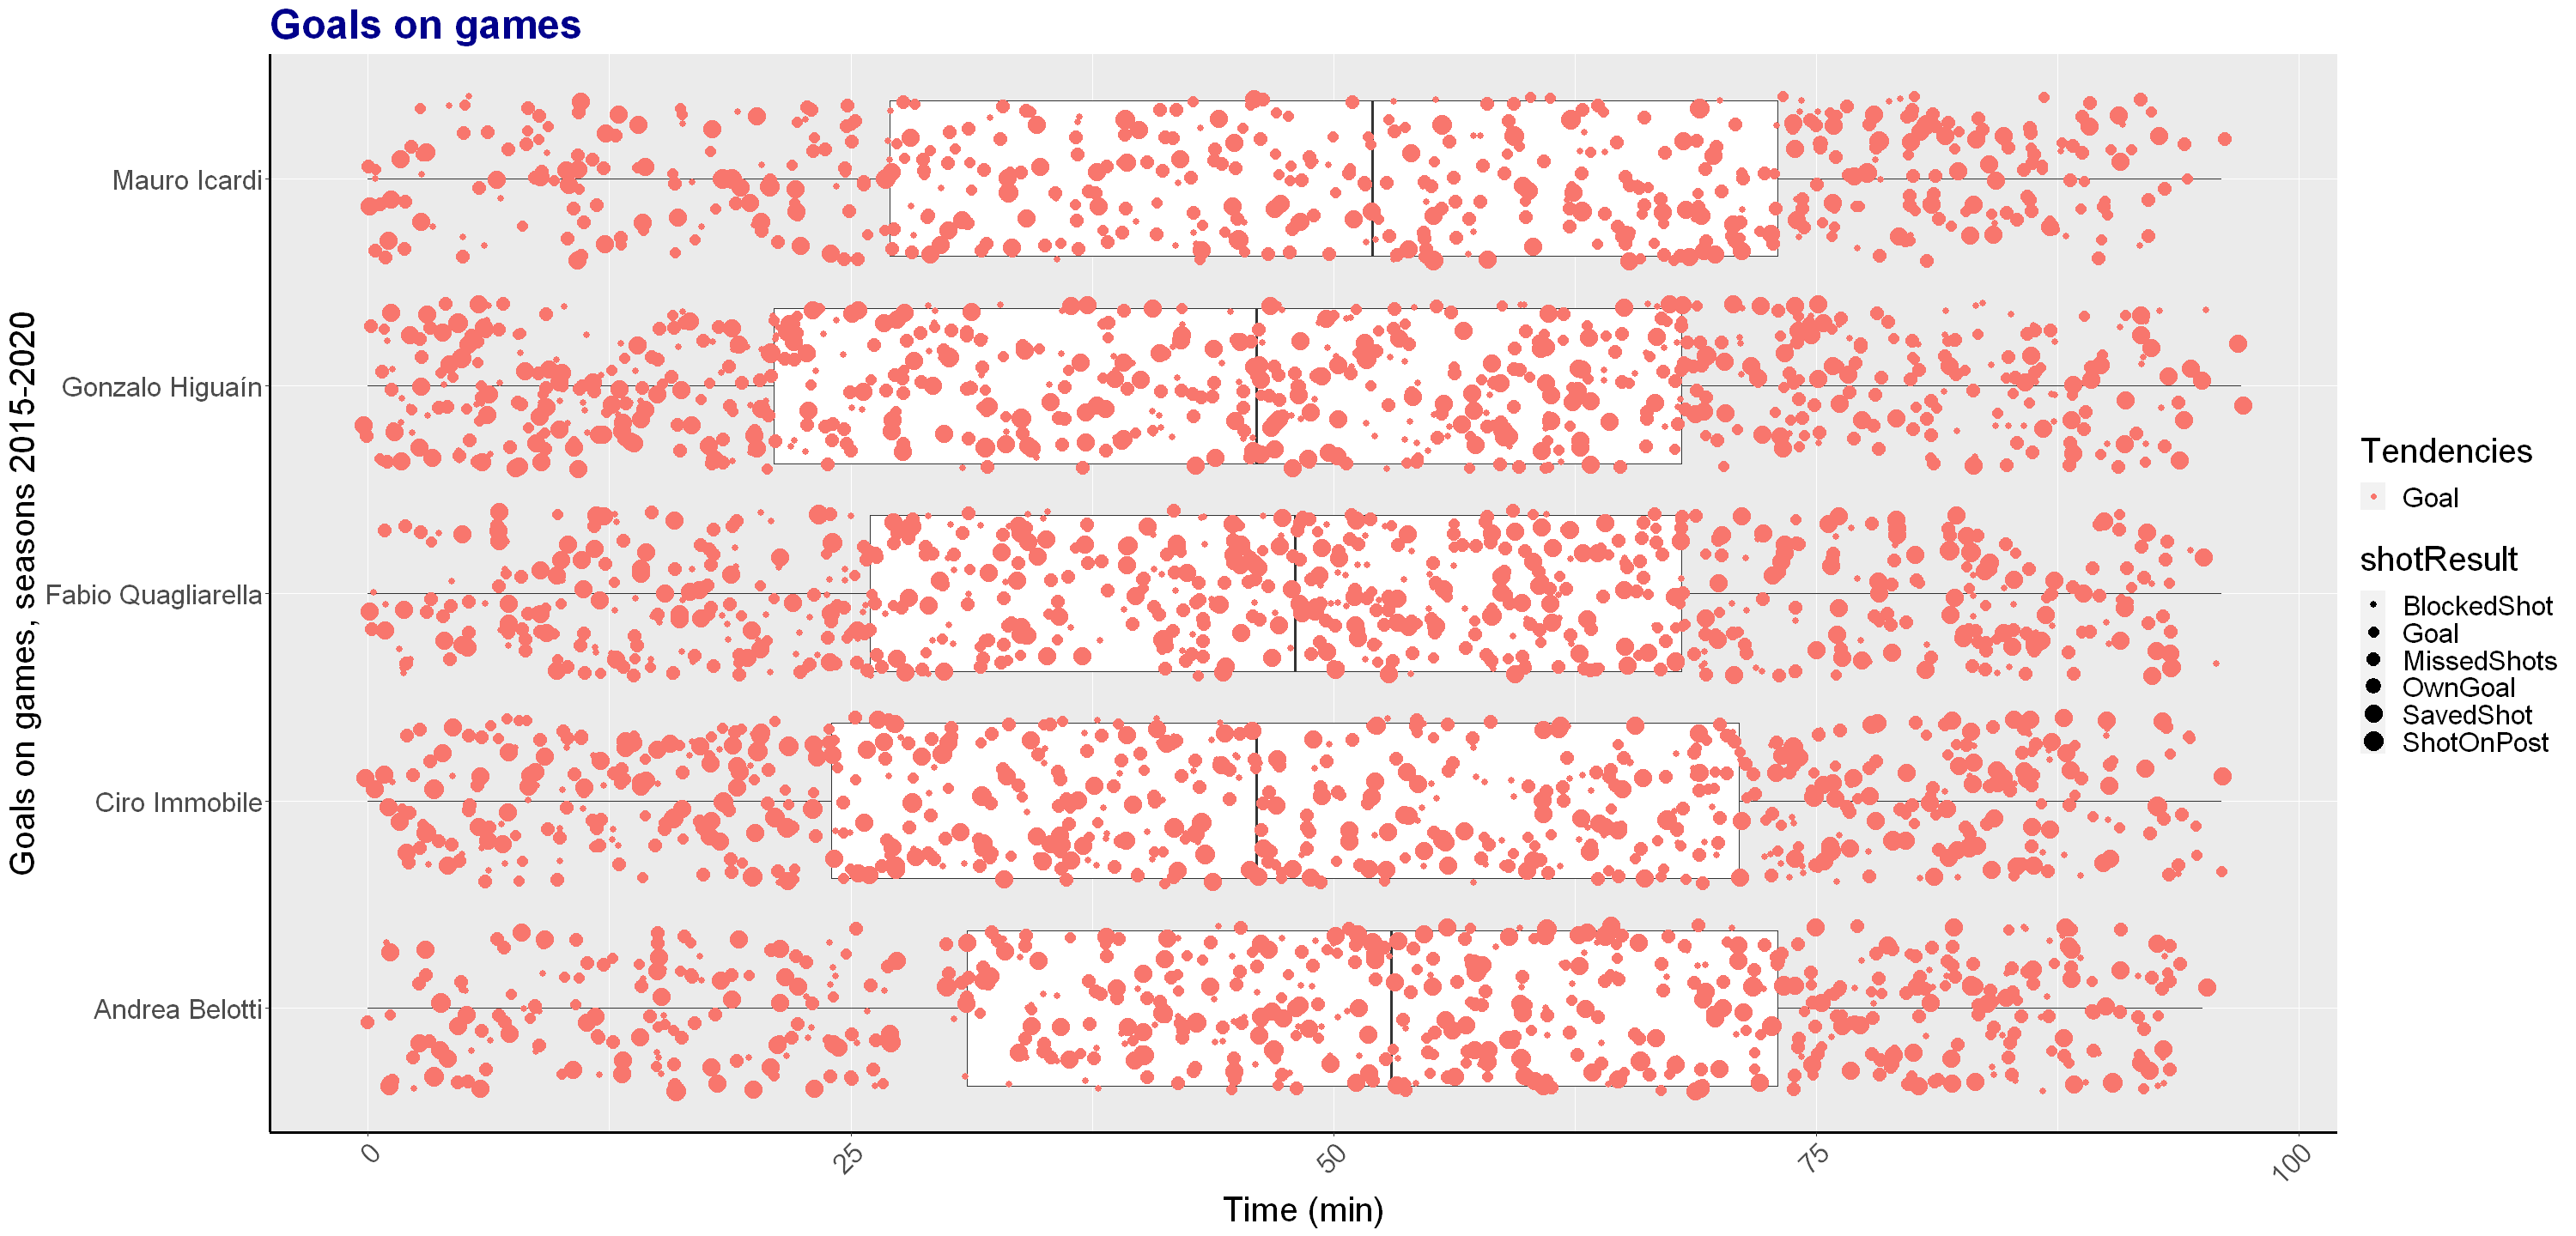

In [116]:
ggplot(data=best_players, aes(x=minute, y=factor(player_name))) +
    geom_boxplot(outlier.colour = "red", outlier.fill="red", outlier.size=3) +
    geom_jitter(aes(color=c(shotsResult="Goal"), size=shotResult)) +
    #coord_cartesian(xlim=c(55, 90)) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 24)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), plot.title = element_text(color="Dark Blue", size=28, face="bold")) +
    labs(x="Time (min)", y="Goals on games, seasons 2015-2020", title="Goals on games", color="Tendencies")

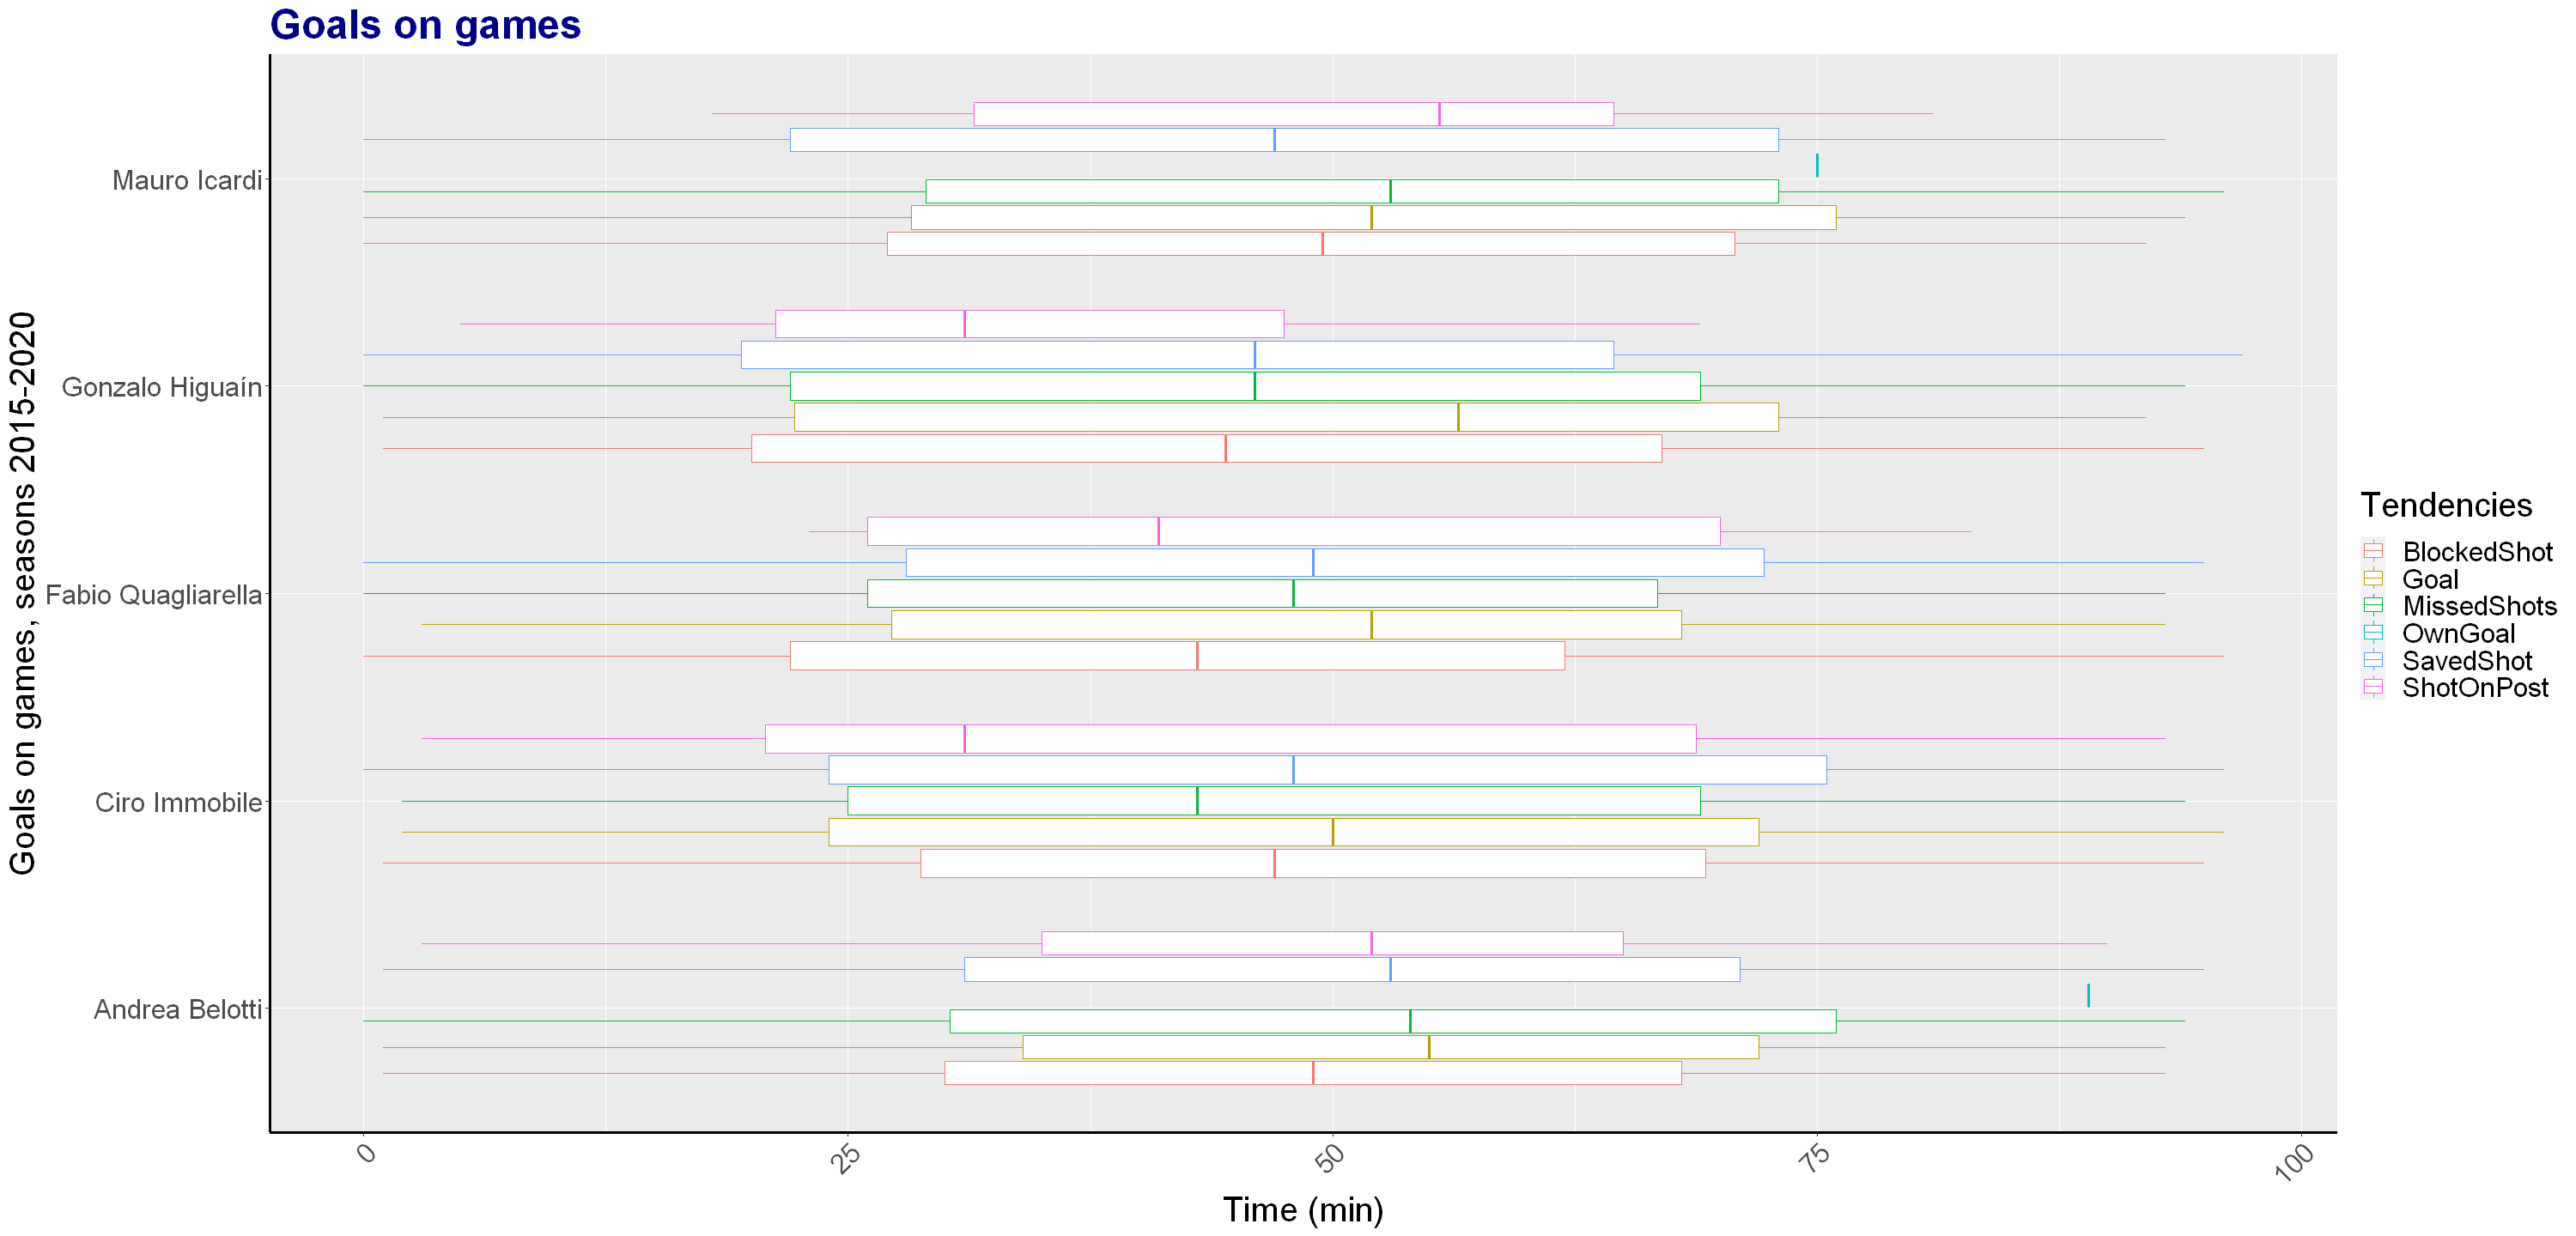

In [101]:
ggplot(data=best_players, aes(x=minute, y=factor(player_name), color=factor(shotResult))) +
    geom_boxplot(outlier.colour = "red", outlier.fill="red", outlier.size=3) +
    #geom_jitter(aes(color=c(shotsResult="Goal")), size=1.5) +
    #coord_cartesian(xlim=c(55, 90)) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 24)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), plot.title = element_text(color="Dark Blue", size=28, face="bold")) +
    labs(x="Time (min)", y="Goals on games, seasons 2015-2020", title="Goals on games", color="Tendencies")

### **Datos:**

#### <a id="1"></a> Pablo Peitsch
#### Mis repositorios de Github: <a href="https://github.com/PPeitsch">@PPeitsch</a>
#### Los datasets fueron adquiridos de: <a href="https://www.kaggle.com/datasets/technika148/football-database">Football dataset</a>
#### Información sobre la variable Xstats, Expected Goals (xG):
- <a href="https://understat.com/">understat.com</a>
- <a href="https://onefootball.com/es/noticias/que-son-los-expected-goals-xg-30199741">onefootball.com</a>
